# Atividade 02

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
#Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster

In [2]:
# Carregar os dados do arquivo CSV
df = pd.read_csv('./data/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [4]:
# Análise descritiva geral das variáveis numéricas
print("Descrição Geral das Variáveis:")
desc_table = PrettyTable()
desc_table.field_names = ["Variável"] + list(df.describe().index)
desc_table.align["Variável"] = "l"
for col in df.select_dtypes('number').columns:
    desc_table.add_row([col] + [f"{val:.2f}" for val in df.describe()[col]])
print(desc_table)

Descrição Geral das Variáveis:
+-------------------------+----------+---------+---------+------+--------+--------+---------+----------+
| Variável                |  count   |   mean  |   std   | min  |  25%   |  50%   |   75%   |   max    |
+-------------------------+----------+---------+---------+------+--------+--------+---------+----------+
| Administrative          | 12330.00 |   2.32  |   3.32  | 0.00 |  0.00  |  1.00  |   4.00  |  27.00   |
| Administrative_Duration | 12330.00 |  80.82  |  176.78 | 0.00 |  0.00  |  7.50  |  93.26  | 3398.75  |
| Informational           | 12330.00 |   0.50  |   1.27  | 0.00 |  0.00  |  0.00  |   0.00  |  24.00   |
| Informational_Duration  | 12330.00 |  34.47  |  140.75 | 0.00 |  0.00  |  0.00  |   0.00  | 2549.38  |
| ProductRelated          | 12330.00 |  31.73  |  44.48  | 0.00 |  7.00  | 18.00  |  38.00  |  705.00  |
| ProductRelated_Duration | 12330.00 | 1194.75 | 1913.67 | 0.00 | 184.14 | 598.94 | 1464.16 | 63973.52 |
| BounceRates           

Distribuição das Variáveis Categóricas:
+-------+----------+
| Month | Contagem |
+-------+----------+
| May   |   3364   |
| Nov   |   2998   |
| Mar   |   1907   |
| Dec   |   1727   |
| Oct   |   549    |
| Sep   |   448    |
| Aug   |   433    |
| Jul   |   432    |
| June  |   288    |
| Feb   |   184    |
+-------+----------+
+-------------------+----------+
| VisitorType       | Contagem |
+-------------------+----------+
| Returning_Visitor |  10551   |
| New_Visitor       |   1694   |
| Other             |    85    |
+-------------------+----------+
Não há valores faltantes nas variáveis.
Distribuição das Variáveis Numéricas:


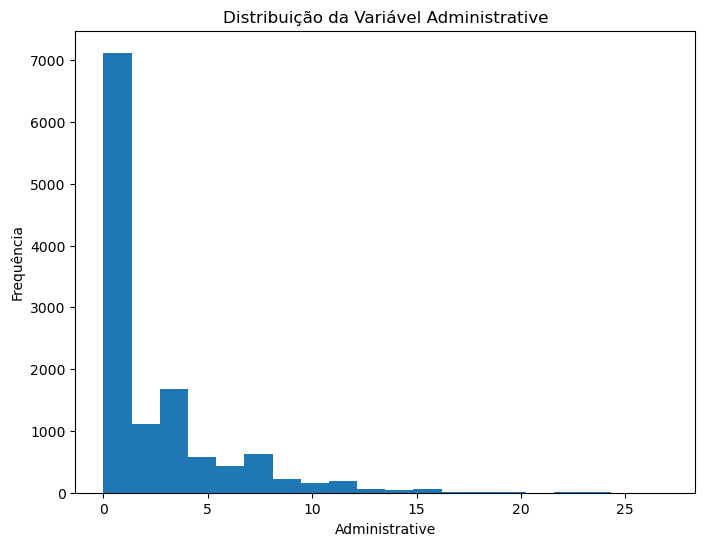

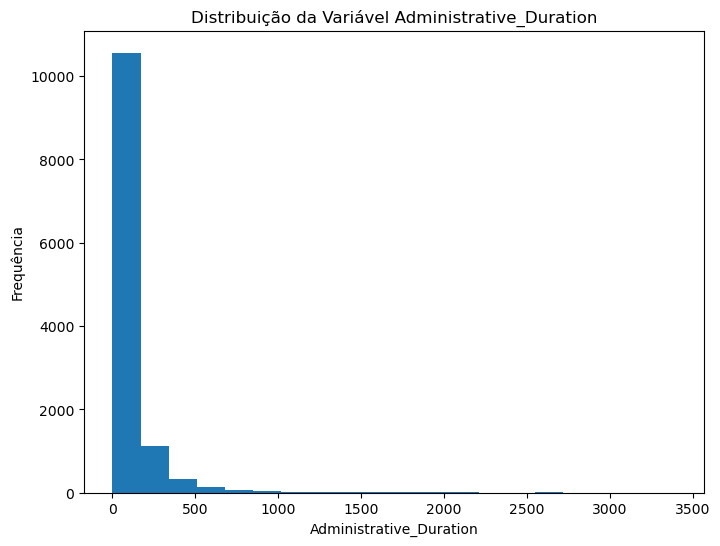

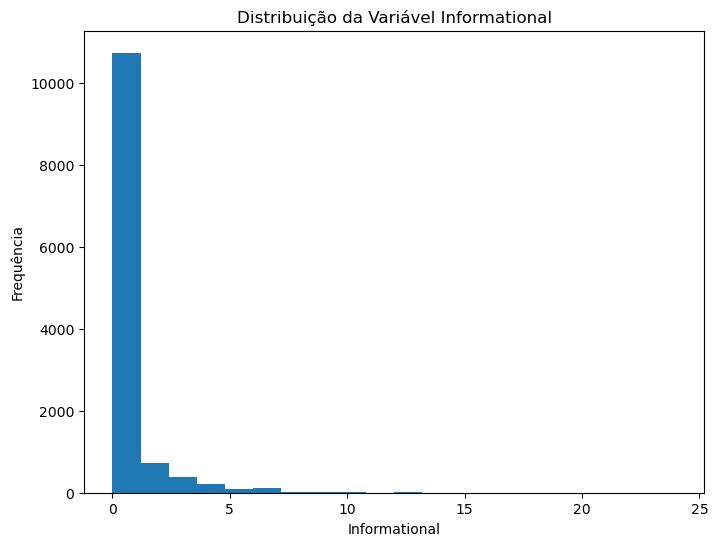

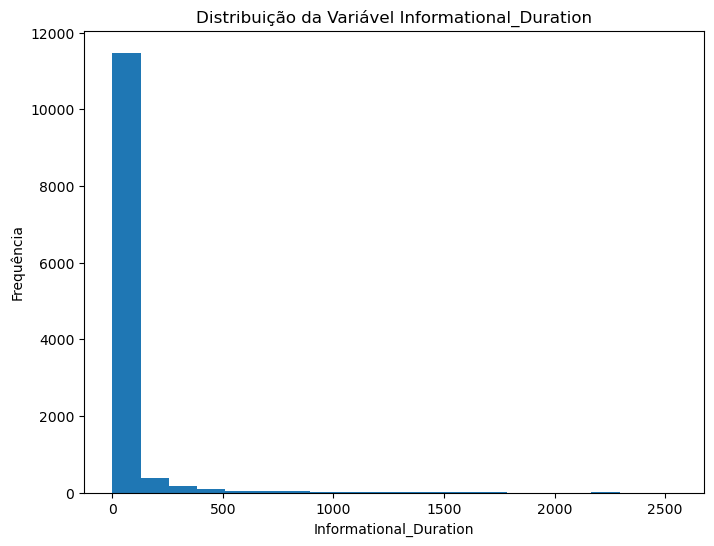

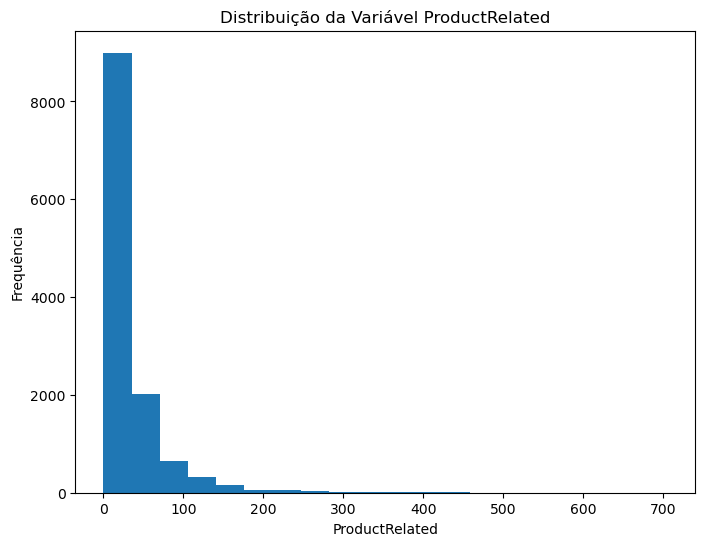

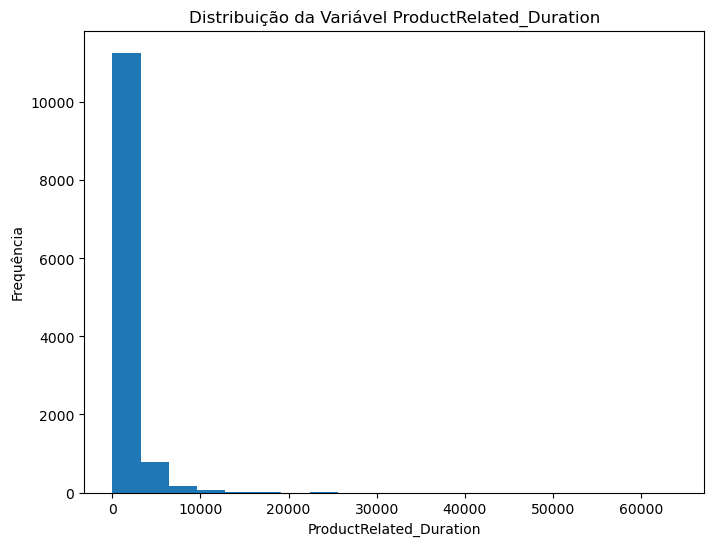

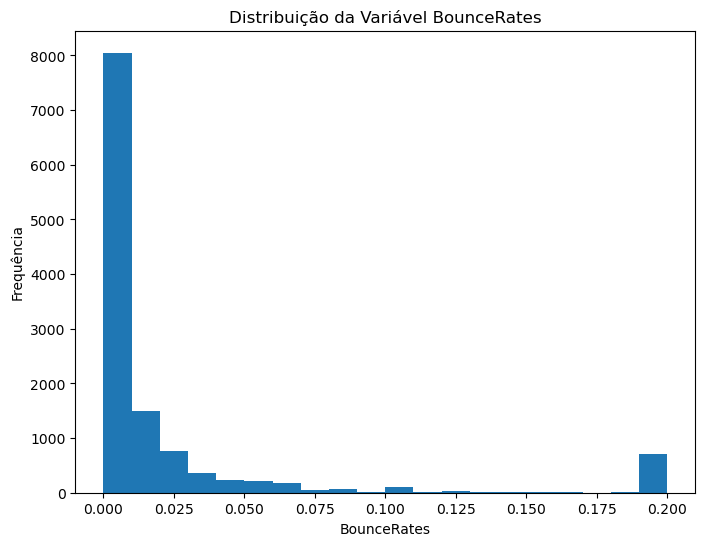

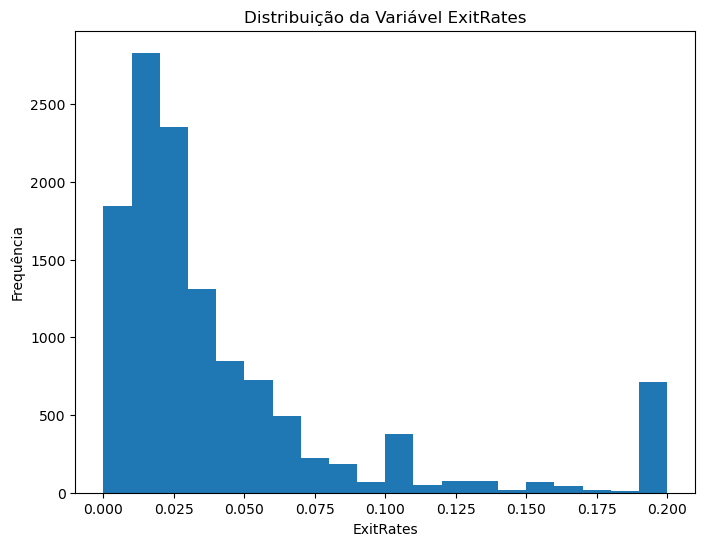

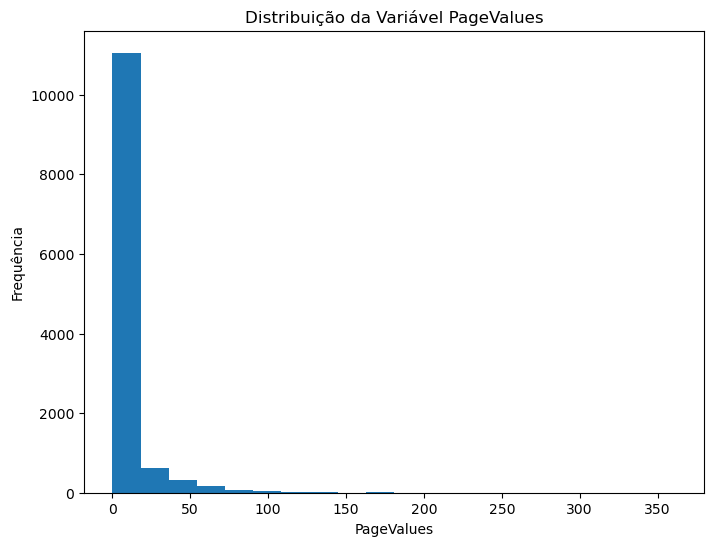

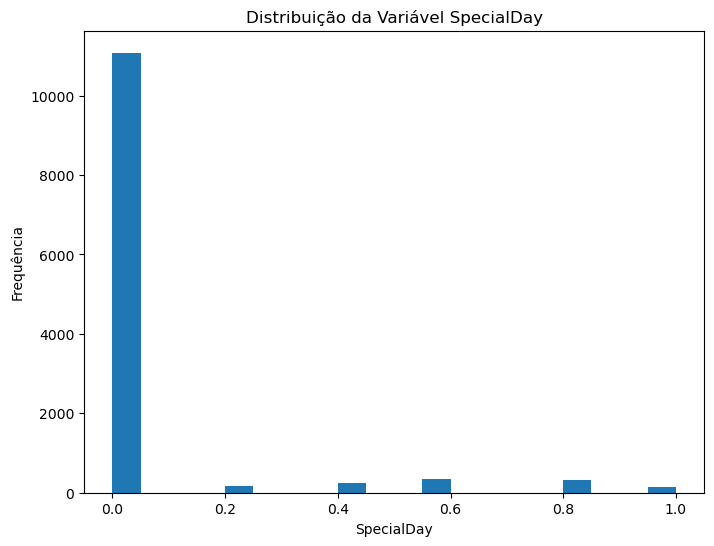

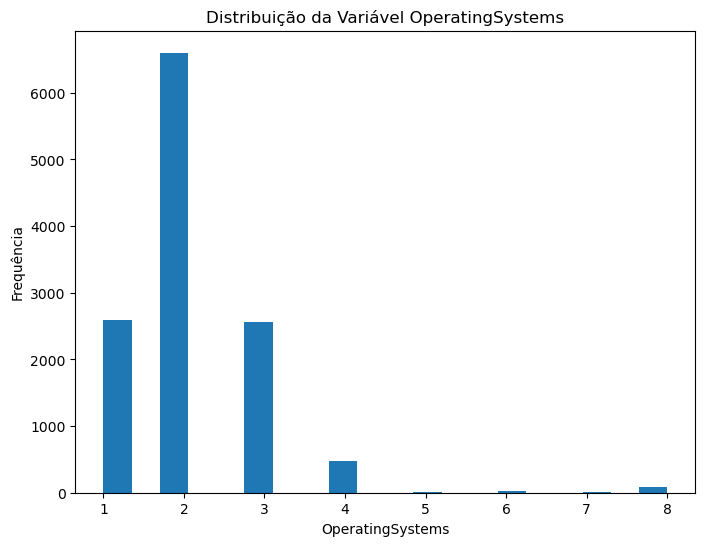

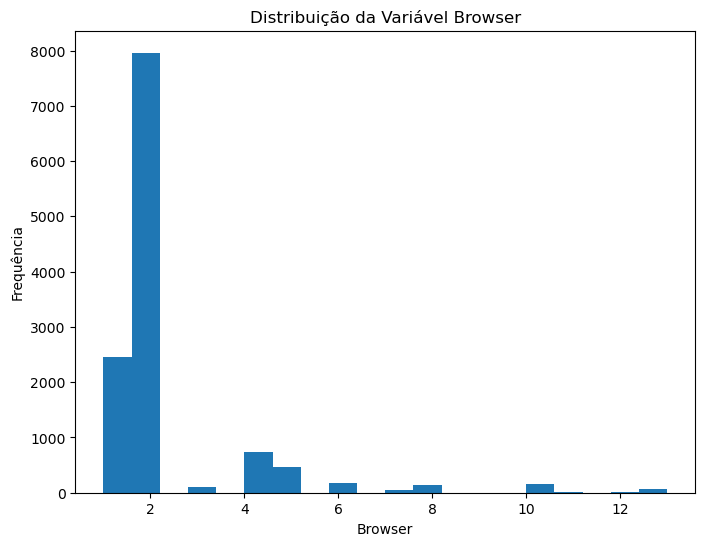

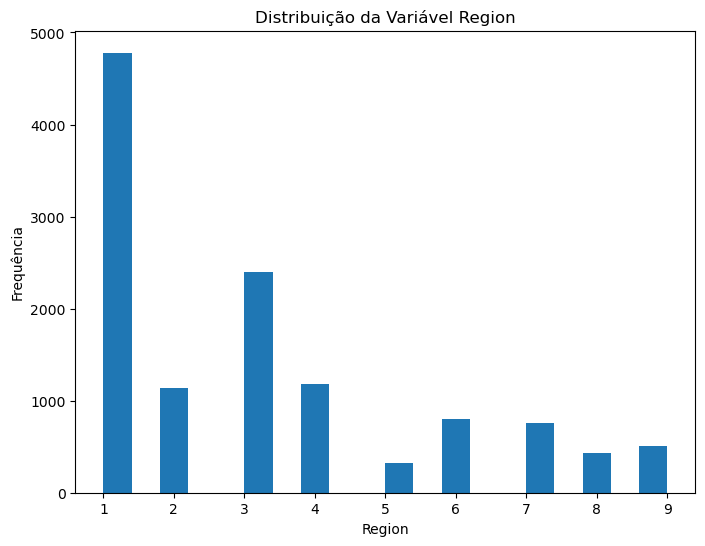

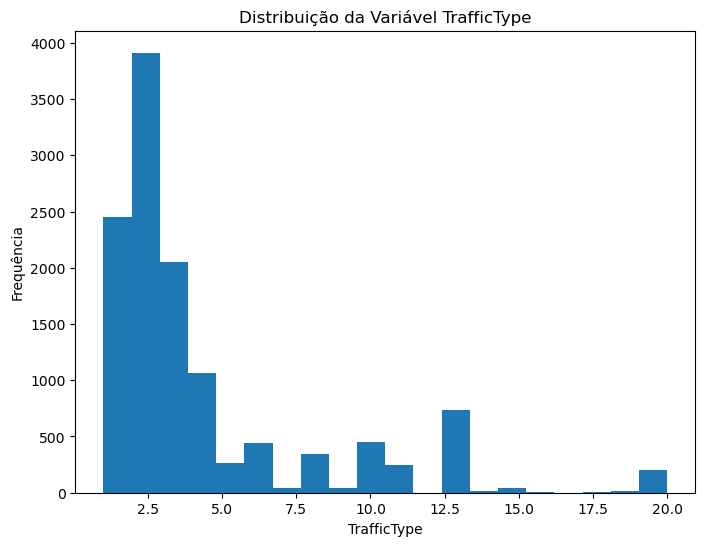

In [5]:
# Exibir a distribuição das variáveis categóricas
print("Distribuição das Variáveis Categóricas:")
for col in df.select_dtypes('object').columns:
    dist_table = PrettyTable()
    dist_table.field_names = [col, "Contagem"]
    dist_table.align[col] = "l"
    for category, count in df[col].value_counts().items():
        dist_table.add_row([category, count])
    print(dist_table)

# Verificar valores faltantes
missing_values = df.isnull().sum()
if missing_values.any():
    print("Variáveis com valores faltantes:")
    missing_table = PrettyTable()
    missing_table.field_names = ["Variável", "Quantidade de Valores Faltantes"]
    missing_table.align["Variável"] = "l"
    for col, count in missing_values[missing_values > 0].items():
        missing_table.add_row([col, count])
    print(missing_table)
    
    # Tratar valores faltantes
    imputer = SimpleImputer(strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    print("Valores faltantes tratados com imputação pela média.")
else:
    print("Não há valores faltantes nas variáveis.")
    df_imputed = df

# Codificar variáveis categóricas
categorical_columns = df_imputed.select_dtypes('object').columns
encoder = OneHotEncoder()
encoded_columns = pd.DataFrame(encoder.fit_transform(df_imputed[categorical_columns]).toarray(),
                            columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([df_imputed.select_dtypes('number'), encoded_columns], axis=1)

# Normalizar variáveis numéricas
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

# Visualizar a distribuição das variáveis numéricas
print("Distribuição das Variáveis Numéricas:")
for col in df.select_dtypes('number').columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=20)
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.title(f"Distribuição da Variável {col}")
    plt.show()

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

In [6]:
# Seleção de variáveis para agrupamento
print("Seleção e Pré-processamento das Variáveis de Agrupamento:")
vars_agrupamento = ['Administrative', 'Informational', 'ProductRelated',
                    'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration',
                    'SpecialDay', 'Month', 'Weekend']

vars_table = PrettyTable()
vars_table.field_names = ["Variáveis de Agrupamento"]
vars_table.align["Variáveis de Agrupamento"] = "l"
for var in vars_agrupamento:
    vars_table.add_row([var])
print(vars_table)

# Verificar se as variáveis de agrupamento estão presentes
missing_vars = set(vars_agrupamento) - set(df.columns)
if missing_vars:
    raise ValueError(f"As seguintes variáveis de agrupamento não estão presentes no DataFrame: {missing_vars}")

# Tratar valores faltantes nas variáveis de agrupamento
df_agrupamento = df[vars_agrupamento].copy()
num_vars = ['Administrative', 'Informational', 'ProductRelated',
            'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration',
            'SpecialDay']
cat_vars = ['Month', 'Weekend']

vars_types_table = PrettyTable()
vars_types_table.field_names = ["Tipo", "Variáveis"]
vars_types_table.align["Tipo"] = "l"
vars_types_table.align["Variáveis"] = "l"
vars_types_table.add_row(["Numéricas", ", ".join(num_vars)])
vars_types_table.add_row(["Categóricas", ", ".join(cat_vars)])
print(vars_types_table)

imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

df_agrupamento[num_vars] = imputer_num.fit_transform(df_agrupamento[num_vars])
df_agrupamento[cat_vars] = imputer_cat.fit_transform(df_agrupamento[cat_vars])

Seleção e Pré-processamento das Variáveis de Agrupamento:
+--------------------------+
| Variáveis de Agrupamento |
+--------------------------+
| Administrative           |
| Informational            |
| ProductRelated           |
| Administrative_Duration  |
| Informational_Duration   |
| ProductRelated_Duration  |
| SpecialDay               |
| Month                    |
| Weekend                  |
+--------------------------+
+-------------+-------------------------------------------------------------------------------------------------------------------------------------+
| Tipo        | Variáveis                                                                                                                           |
+-------------+-------------------------------------------------------------------------------------------------------------------------------------+
| Numéricas   | Administrative, Informational, ProductRelated, Administrative_Duration, Informational_Duration, Pro

In [7]:
# Codificar variáveis qualitativas
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
df_cat = pd.DataFrame(encoder.fit_transform(df_agrupamento[cat_vars]), columns=encoder.get_feature_names_out(cat_vars))
df_agrupamento = pd.concat([df_agrupamento, df_cat], axis=1)
df_agrupamento = df_agrupamento.drop(columns=cat_vars)

print("Codificação one-hot das variáveis categóricas:")

onehot_vars_table = PrettyTable()
onehot_vars_table.field_names = ["Variáveis após a codificação one-hot"]
onehot_vars_table.align["Variáveis após a codificação one-hot"] = "l"
for var in list(df_agrupamento.columns):
    onehot_vars_table.add_row([var])
print(onehot_vars_table)

Codificação one-hot das variáveis categóricas:
+--------------------------------------+
| Variáveis após a codificação one-hot |
+--------------------------------------+
| Administrative                       |
| Informational                        |
| ProductRelated                       |
| Administrative_Duration              |
| Informational_Duration               |
| ProductRelated_Duration              |
| SpecialDay                           |
| Month_Aug                            |
| Month_Dec                            |
| Month_Feb                            |
| Month_Jul                            |
| Month_June                           |
| Month_Mar                            |
| Month_May                            |
| Month_Nov                            |
| Month_Oct                            |
| Month_Sep                            |
| Weekend_False                        |
| Weekend_True                         |
+--------------------------------------+


In [8]:
# Padronização das variáveis numéricas
scaler = StandardScaler()
df_agrupamento[num_vars] = scaler.fit_transform(df_agrupamento[num_vars])

print("Padronização das variáveis numéricas concluída:")

final_vars_table = PrettyTable()
final_vars_table.field_names = ["Variáveis após a padronização"]
final_vars_table.align["Variáveis após a padronização"] = "l"
for var in list(df_agrupamento.columns):
    final_vars_table.add_row([var])
print(final_vars_table)

Padronização das variáveis numéricas concluída:
+-------------------------------+
| Variáveis após a padronização |
+-------------------------------+
| Administrative                |
| Informational                 |
| ProductRelated                |
| Administrative_Duration       |
| Informational_Duration        |
| ProductRelated_Duration       |
| SpecialDay                    |
| Month_Aug                     |
| Month_Dec                     |
| Month_Feb                     |
| Month_Jul                     |
| Month_June                    |
| Month_Mar                     |
| Month_May                     |
| Month_Nov                     |
| Month_Oct                     |
| Month_Sep                     |
| Weekend_False                 |
| Weekend_True                  |
+-------------------------------+


## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

In [9]:
# Seleção das variáveis para agrupamento
print("Agrupamento Hierárquico:")
vars_agrupamento = ['Administrative', 'Informational', 'ProductRelated',
                    'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration',
                    'SpecialDay'] + list(df_cat.columns)

vars_table = PrettyTable()
vars_table.field_names = ["Variáveis de Agrupamento"]
vars_table.align["Variáveis de Agrupamento"] = "l"
for var in vars_agrupamento:
    vars_table.add_row([var])
print(vars_table)

Agrupamento Hierárquico:
+--------------------------+
| Variáveis de Agrupamento |
+--------------------------+
| Administrative           |
| Informational            |
| ProductRelated           |
| Administrative_Duration  |
| Informational_Duration   |
| ProductRelated_Duration  |
| SpecialDay               |
| Month_Aug                |
| Month_Dec                |
| Month_Feb                |
| Month_Jul                |
| Month_June               |
| Month_Mar                |
| Month_May                |
| Month_Nov                |
| Month_Oct                |
| Month_Sep                |
| Weekend_False            |
| Weekend_True             |
+--------------------------+


In [10]:
# Criação do DataFrame com as variáveis de agrupamento
df_agrup = df_agrupamento[vars_agrupamento]

# Cálculo da matriz de distâncias
dist = linkage(df_agrup, method='ward')

def print_grupos(n_grupos):
    grupos = fcluster(dist, n_grupos, criterion='maxclust')
    df[f'Grupos_{n_grupos}'] = grupos

    grupos_table = PrettyTable()
    grupos_table.field_names = ["Grupo", "Quantidade de Observações"]
    grupos_table.align["Grupo"] = "l"
    grupos_table.align["Quantidade de Observações"] = "r"
    for grupo in df[f'Grupos_{n_grupos}'].unique():
        qtd_obs = df[df[f'Grupos_{n_grupos}'] == grupo].shape[0]
        grupos_table.add_row([f"Grupo {grupo}", qtd_obs])
    print(f"Agrupamento com {n_grupos} grupos:")
    print(grupos_table)

print_grupos(3)
print_grupos(4)

Agrupamento com 3 grupos:
+---------+---------------------------+
| Grupo   | Quantidade de Observações |
+---------+---------------------------+
| Grupo 3 |                     10174 |
| Grupo 2 |                      1191 |
| Grupo 1 |                       965 |
+---------+---------------------------+
Agrupamento com 4 grupos:
+---------+---------------------------+
| Grupo   | Quantidade de Observações |
+---------+---------------------------+
| Grupo 3 |                      7008 |
| Grupo 2 |                      1191 |
| Grupo 4 |                      3166 |
| Grupo 1 |                       965 |
+---------+---------------------------+


## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [11]:
# Criação do DataFrame com as variáveis de agrupamento
df_agrup = df_agrupamento[vars_agrupamento]

# Cálculo da matriz de distâncias
dist = linkage(df_agrup, method='ward')

def analise_descritiva(n_grupos):
    grupos = fcluster(dist, n_grupos, criterion='maxclust')
    df[f'Grupos_{n_grupos}'] = grupos

    print(f"Análise Descritiva - Agrupamento com {n_grupos} grupos:")
    
    for grupo in df[f'Grupos_{n_grupos}'].unique():
        print(f"Grupo {grupo}:")
        grupo_df = df[df[f'Grupos_{n_grupos}'] == grupo]
        
        desc_table = PrettyTable()
        desc_table.field_names = ["Variável", "Média", "Desvio Padrão", "Mínimo", "Máximo"]
        desc_table.align["Variável"] = "l"
        
        for var in vars_agrupamento:
            if var in grupo_df.columns:
                desc_table.add_row([var, 
                                    f"{grupo_df[var].mean():.2f}",
                                    f"{grupo_df[var].std():.2f}",
                                    f"{grupo_df[var].min():.2f}",
                                    f"{grupo_df[var].max():.2f}"])
        
        print(desc_table)

    print(f"Quantidade total de observações no agrupamento com {n_grupos} grupos: {df[f'Grupos_{n_grupos}'].count()}")

analise_descritiva(3)
analise_descritiva(4)

Análise Descritiva - Agrupamento com 3 grupos:
Grupo 3:
+-------------------------+--------+---------------+--------+----------+
| Variável                | Média  | Desvio Padrão | Mínimo |  Máximo  |
+-------------------------+--------+---------------+--------+----------+
| Administrative          |  2.12  |      3.01     |  0.00  |  26.00   |
| Informational           |  0.25  |      0.69     |  0.00  |  12.00   |
| ProductRelated          | 25.81  |     28.44     |  0.00  |  225.00  |
| Administrative_Duration | 77.11  |     173.40    |  0.00  | 2720.50  |
| Informational_Duration  |  9.47  |     40.85     |  0.00  | 1146.67  |
| ProductRelated_Duration | 960.68 |    1193.58    |  0.00  | 13158.67 |
| SpecialDay              |  0.00  |      0.01     |  0.00  |   0.60   |
+-------------------------+--------+---------------+--------+----------+
Grupo 2:
+-------------------------+--------+---------------+--------+---------+
| Variável                | Média  | Desvio Padrão | Mínimo 

Decisão pelo Agrupamento Final: 

- Com base nas análises realizadas, o agrupamento com 4 grupos parece ser a melhor escolha pois oferece um nível de granularidade adequado para a análise e estratégia da empresa;

- Os grupos formados apresentam características distintas e bem definidas.

Nomes:
- 1 Visitantes Casuais
- 2 Pesquisadores de Produtos
- 3 Potenciais Compradores
- 4 Compradores Frequentes

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [12]:
# Criar um dicionário para mapear os números dos grupos aos seus nomes
print("Avaliação de Resultados:")
grupo_nomes = {
    1: "Visitantes Casuais",
    2: "Pesquisadores de Produtos",
    3: "Potenciais Compradores",
    4: "Compradores Frequentes"
}

def avaliar_grupos(n_grupos):
    print(f"Avaliação para o agrupamento com {n_grupos} grupos:")
    tabela_grupos = PrettyTable()
    tabela_grupos.field_names = ["Grupo", "BounceRates Médio", "Revenue Médio"]
    tabela_grupos.align["Grupo"] = "l"
    grupo_medias = df.groupby(f'Grupos_{n_grupos}')[['BounceRates', 'Revenue']].mean()
    for grupo, valores in grupo_medias.iterrows():
        tabela_grupos.add_row([grupo_nomes[int(str(grupo))]] + [f"{val:.2f}" for val in valores])
    print(tabela_grupos)

    grupo_mais_propenso = grupo_medias['Revenue'].idxmax()
    grupo_mais_propenso_nome = grupo_nomes[int(str(grupo_mais_propenso))]
    print(f'No agrupamento com {n_grupos} grupos, o {grupo_mais_propenso_nome} tem os clientes mais propensos à compra.')

avaliar_grupos(3)
avaliar_grupos(4)

Avaliação de Resultados:
Avaliação para o agrupamento com 3 grupos:
+---------------------------+-------------------+---------------+
| Grupo                     | BounceRates Médio | Revenue Médio |
+---------------------------+-------------------+---------------+
| Visitantes Casuais        |        0.01       |      0.28     |
| Pesquisadores de Produtos |        0.04       |      0.06     |
| Potenciais Compradores    |        0.02       |      0.15     |
+---------------------------+-------------------+---------------+
No agrupamento com 3 grupos, o Visitantes Casuais tem os clientes mais propensos à compra.
Avaliação para o agrupamento com 4 grupos:
+---------------------------+-------------------+---------------+
| Grupo                     | BounceRates Médio | Revenue Médio |
+---------------------------+-------------------+---------------+
| Visitantes Casuais        |        0.01       |      0.28     |
| Pesquisadores de Produtos |        0.04       |      0.06     |
| Pote